This notebook contains code for an 'out of the box' solution to the Drivendata blood donor competition (https://www.drivendata.org/competitions/2/warm-up-predict-blood-donations/). It generates a score that is just inside the top one third of the leader board.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm as cm

In [2]:
df = pd.read_csv('train.csv')

Check for nulls

In [3]:
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns
    
df_m = missing_values_table(df)

Your selected dataframe has 6 columns.
There are 0 columns that have missing values.


Investigate correlation between features.

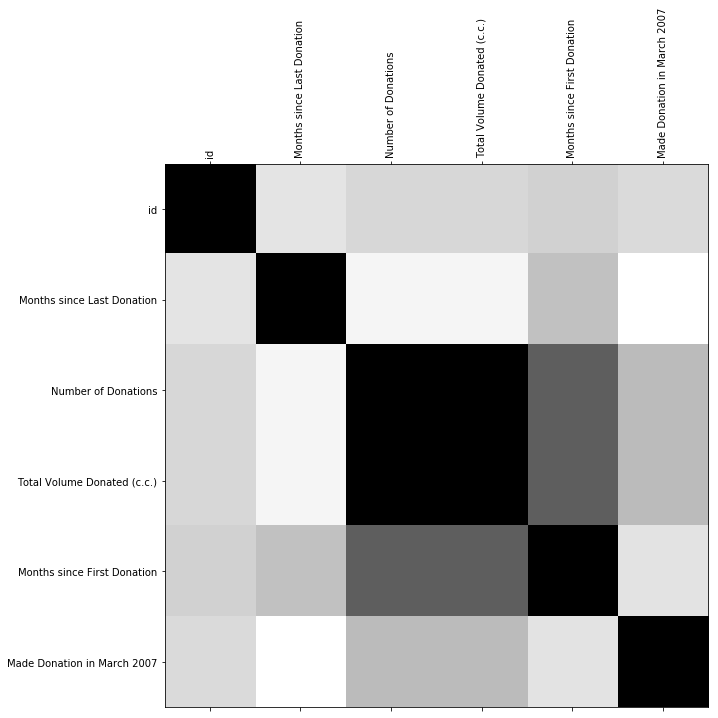

In [4]:
def plot_corr(df,size=4):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr,cmap=cm.Greys)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical');
    plt.yticks(range(len(corr.columns)), corr.columns);
    plt.show()
    
    
plot_corr(df,10)

In terms of the target field: Made donation in March 2007, the most important fields are Number of donations, total volume donated, next is Months since first donation and least important is Months since last donation.



In [5]:
from sklearn import tree, preprocessing
import sklearn.ensemble as ske
from sklearn.model_selection import train_test_split


In [6]:
X = df.drop(['Made Donation in March 2007','id'], axis=1).values
y = df['Made Donation in March 2007'].values

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

Compare two algorithms

In [8]:
clf_rf = ske.RandomForestClassifier(n_estimators=50)
clf_rf = clf_rf.fit(X_train, y_train)
print(clf_rf.score(X_test,y_test))

0.7572254335260116


In [9]:
clf_gb = ske.GradientBoostingClassifier(n_estimators=50)
clf_gb = clf_gb.fit(X_train, y_train)
print(clf_gb.score(X_test,y_test))

0.7745664739884393


gradient boost produces a slightly better result

Which feature(s) contribute most to the result?

In [10]:
importance = clf_gb.feature_importances_
print(importance)

[0.24417187 0.19550403 0.18848775 0.37183635]


Months since first donation and months since last donation are the most important features in the prediction.

In [13]:
test = pd.read_csv('test.csv')
test = test.drop(['id'],axis=1)
testv = test.values
pred = clf_gb.predict(testv)

In [14]:
print(pred)

[0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]


Export the data, I then manually copied and added the id column from the test csv file and submitted the csv file.

In [15]:
pd.DataFrame(pred).to_csv('output.csv', header=False, index=False)